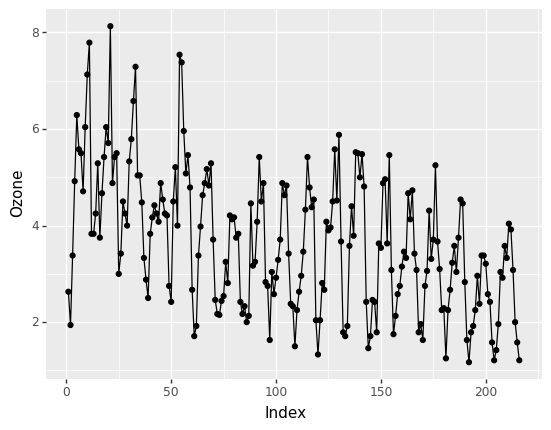

<ggplot: (8770814952333)>

In [1]:
# CASE TWO
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as ss
from plotnine import *
import statsmodels.api as sm
import statsmodels.formula.api as smf

#1 Import the data from Nenana1.csv
data = pd.read_csv("https://raw.githubusercontent.com/robertasgabrys/Forecasting/main/dtwnLAozone.csv", header=2)
data = data.rename(columns={'Unnamed: 0':'Year'})
data = data.set_index(['Year']).stack().reset_index()
data.columns = ['Year','Month','Ozone'] # Column Ozone is KPI
data['Index'] = list(range(217))[1:]

(
    ggplot(data,aes('Index','Ozone')) + geom_point() + geom_line() 
)


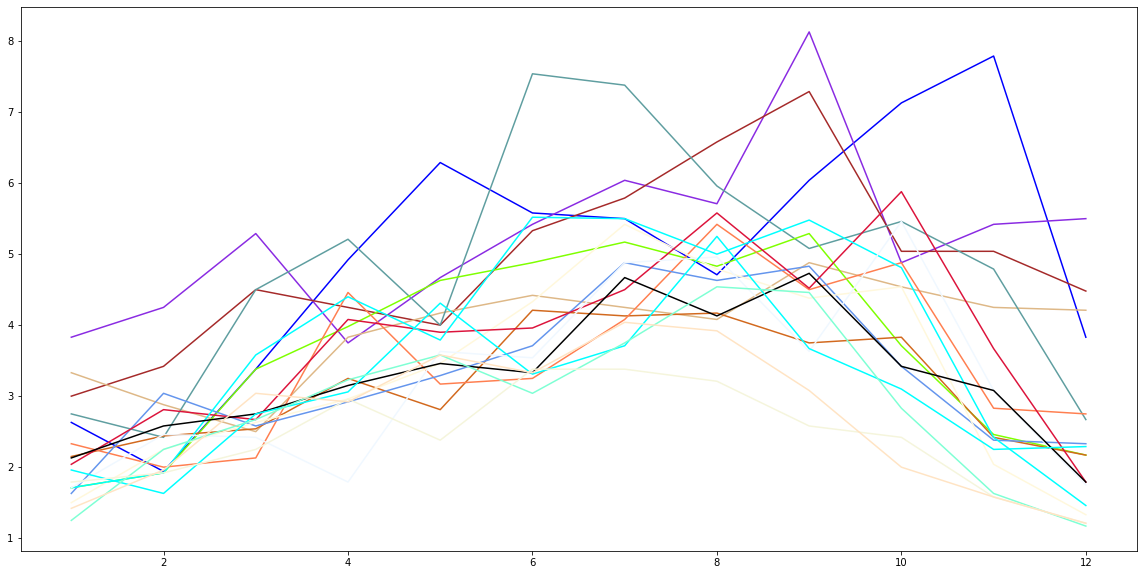

In [2]:
color=['blue','blueviolet','brown','burlywood','cadetblue','chartreuse',
       'chocolate','coral','cornflowerblue','cornsilk','crimson',
       'cyan','aliceblue','black','aqua','aquamarine','beige','bisque']
m = list(range(1,13))

fig=plt.figure(figsize=(20,10))
for i in range(18):
    label = data['Year'][i*12]
    y = ()
    for j in range(12):
        y = np.append(y,data['Ozone'][i*12+j])
    plt.plot(m,y,c=color[i],label = label)
plt.show()

In [3]:
# # effectiveness of 1960 policy
# ss.ttest_ind(a=data.loc[:5,'Ozone'], b=data.loc[6:,'Ozone'], equal_var=False, alternative='greater')


                            OLS Regression Results                            
Dep. Variable:            Ozonebefore   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     35.34
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           2.40e-08
Time:                        05:34:46   Log-Likelihood:                -218.19
No. Observations:                 132   AIC:                             440.4
Df Residuals:                     130   BIC:                             446.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7742      0.164     29.042      0.0

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 84 rows containing missing values.


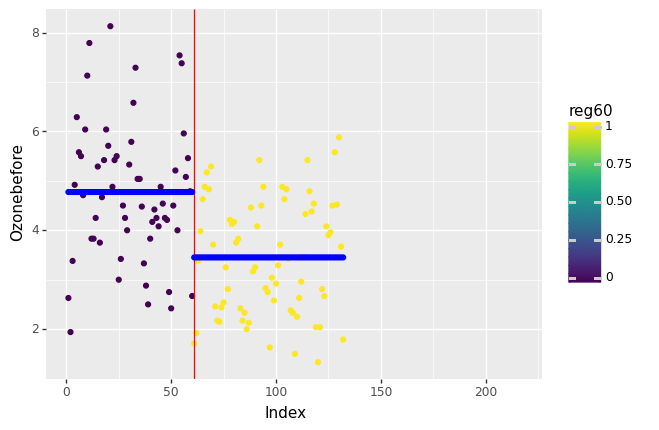

<ggplot: (8770812935805)>

In [4]:
# assess abrupt change for 1960 policy
data['Ozonebefore'] = data['Ozone']
data.loc[data['Year']>=1966,'Ozonebefore'] = np.nan 

data['reg60'] = 0
data.loc[data['Year']>=1960,'reg60'] = 1
M_abrupt = smf.ols('Ozonebefore~reg60',data=data).fit()
print(M_abrupt.summary())

M_abrupt.fittedvalues
data['M_abrupt'] = M_abrupt.fittedvalues
(
    ggplot(data, aes('Index','Ozonebefore',color='reg60')) + geom_point() + 
 geom_vline(xintercept = data.loc[(data['Year']==1960) & (data['Month']=="Jan.") ,
'Index'], color='red') +  geom_point(aes('Index','M_abrupt'),color='blue') 
)

                            OLS Regression Results                            
Dep. Variable:            Ozonebefore   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     15.18
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           0.000156
Time:                        05:34:46   Log-Likelihood:                -226.77
No. Observations:                 132   AIC:                             457.5
Df Residuals:                     130   BIC:                             463.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4381      0.154     28.775      0.0

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 84 rows containing missing values.


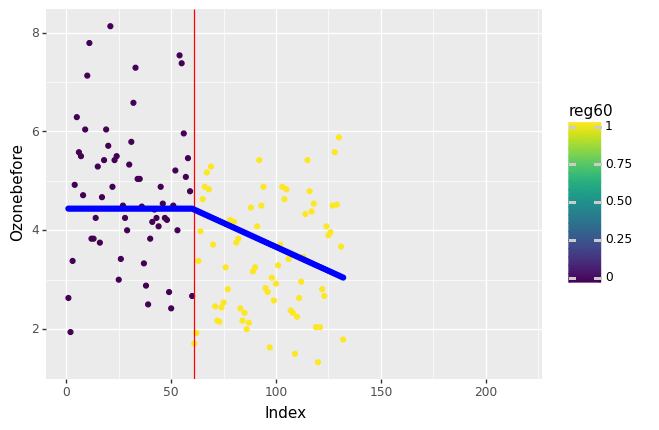

<ggplot: (8770810229097)>

In [5]:
# assess gradual change for 1960
data['Ramp'] = 0
data.loc[60:,'Ramp'] = list(range(157))[1:]


M_gradual = smf.ols('Ozonebefore~Ramp',data=data).fit()
print(M_gradual.summary())

data['M_gradual'] = M_gradual.fittedvalues
(
    ggplot(data,aes('Index','Ozonebefore',color='reg60')) + geom_point() + 
 geom_vline(xintercept = data.loc[(data['Year']==1960) & (data['Month']=="Jan.") ,
'Index'], color='red') + geom_point(aes('Index','M_gradual'),color='blue')
)


                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     28.51
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           2.38e-07
Time:                        05:34:47   Log-Likelihood:                -367.60
No. Observations:                 216   AIC:                             739.2
Df Residuals:                     214   BIC:                             746.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0524      0.116     34.923      0.0

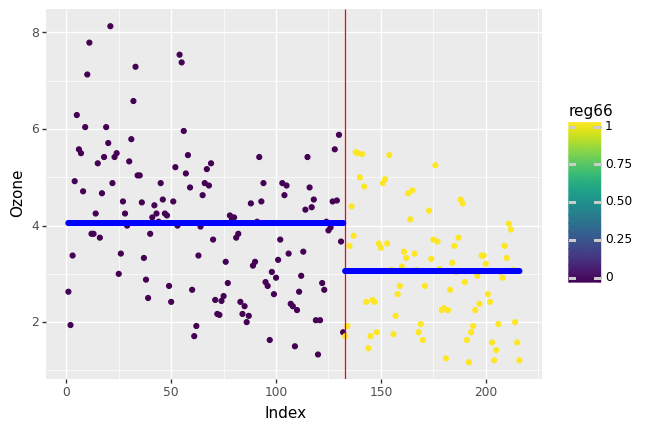

<ggplot: (8770810200829)>

In [6]:
# assess abrupt change for 1966 policy
data['reg66'] = 0
data.loc[data['Year']>=1966,'reg66'] = 1
M_abrupt2 = smf.ols('Ozone~reg66',data=data).fit()
print(M_abrupt2.summary())

data['M_abrupt2'] = M_abrupt2.fittedvalues
(
    ggplot(data, aes('Index','Ozone',color='reg66')) + geom_point() + 
 geom_vline(xintercept = data.loc[(data['Year']==1966) & (data['Month']=="Jan.") ,'Index'], color='red') +  
 geom_point(aes('Index','M_abrupt2'),color='blue') 
)

                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     34.51
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           1.60e-08
Time:                        05:34:48   Log-Likelihood:                -364.96
No. Observations:                 216   AIC:                             733.9
Df Residuals:                     214   BIC:                             740.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0053      0.107     37.572      0.0

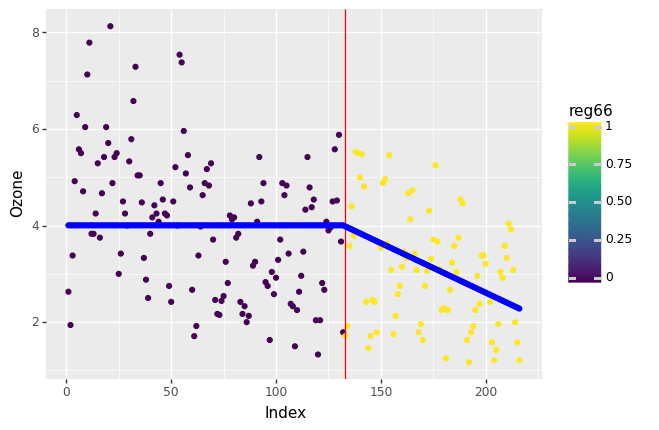

<ggplot: (8770810178505)>

In [7]:
# assess gradual change for 1966
data['Ramp2'] = 0
data.loc[132:,'Ramp2'] = list(range(85))[1:]

M_gradual2 = smf.ols('Ozone~Ramp2',data=data).fit()
print(M_gradual2.summary())

data['M_gradual2'] = M_gradual2.fittedvalues
(
    ggplot(data,aes('Index','Ozone',color='reg66')) + geom_point() + 
 geom_vline(xintercept = data.loc[(data['Year']==1966) & (data['Month']=="Jan.") ,'Index'], color='red') + 
 geom_point(aes('Index','M_gradual2'),color='blue')
)

In [8]:
# final model a,a,g
# data['reg4']
# data['reg4'][:5]= list(range(6))[1:]
# data['reg4'][5:11] = list(range(7))[1:]
# data['reg4'][11:] = list(range(8))[1:]

# M_gradual3 = smf.ols('Mean~reg3+reg4',data=data).fit()
# print(M_gradual3.summary())

# data['M_gradual3'] = M_gradual3.fittedvalues
# (
#     ggplot(data, aes('Year','Mean',color='reg4')) + geom_point() + geom_line() + geom_vline(xintercept=1960, color='red') + geom_vline(xintercept=1966, color='red') + 
#  geom_point(aes('Year','M_gradual3'),color='blue') + geom_smooth(method='lm')
# )



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be

                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     16.28
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           1.45e-13
Time:                        05:41:42   Log-Likelihood:                -345.73
No. Observations:                 216   AIC:                             703.5
Df Residuals:                     210   BIC:                             723.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9371      0.318     15.526      0.0

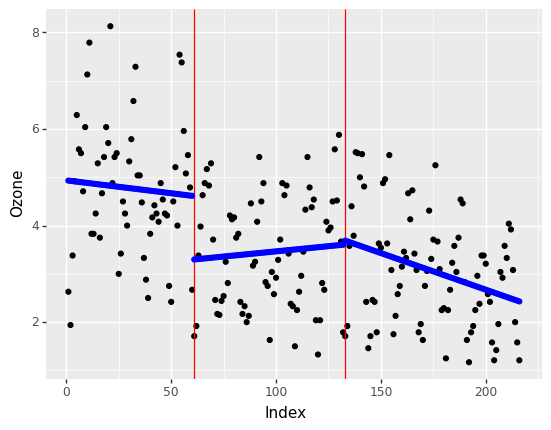

<ggplot: (8770809434377)>

In [27]:
# final final model -- test
data['reg11'] = 0

data['reg12'] = list(range(217))[1:]

data['reg13'] = 0
data['reg13'][60:]= 1

data['reg14'] = 0
data['reg14'][60:]= list(range(157))[1:]

data['reg15'] = 0
data['reg15'][132:]= 1

data['reg16'] = 0
data['reg16'][132:]= list(range(85))[1:]


M_final = smf.ols('Ozone~reg11+reg12+reg13+reg14+reg15+reg16',data=data).fit()  #reg11+reg12+reg13+
print(M_final.summary())

data['M_final'] = M_final.fittedvalues
(
    ggplot(data, aes('Index','Ozone')) + geom_point() + 
 geom_vline(xintercept = data.loc[(data['Year']==1960) & (data['Month']=="Jan.") ,'Index'], color='red') + 
 geom_vline(xintercept = data.loc[(data['Year']==1966) & (data['Month']=="Jan.") ,'Index'], color='red') + 
 geom_point(aes('Index','M_final'),color='blue') #+ geom_smooth(method='lm')
)
